In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [4]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [5]:
geography_dict = {'France':0, 'Spain':1, 'Germany':2}
gender_dict = {'Female':0, 'Male':1}

df['Geography'] = df['Geography'].map(geography_dict)
df['Gender'] = df['Gender'].map(gender_dict)


In [6]:
y = df['Exited']
X = df.drop(columns=['Exited'])

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
model = Sequential([
    Dense(8, activation='relu'),
    Dense(11, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid'),

])

In [25]:
# from keras.optimizers import Adam

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=40)

Epoch 1/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6832 - loss: 0.6857
Epoch 2/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.5630
Epoch 3/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4410
Epoch 4/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.4207
Epoch 5/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8371 - loss: 0.3987
Epoch 6/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8443 - loss: 0.3860
Epoch 7/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8441 - loss: 0.3839
Epoch 8/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8606 - loss: 0.3550
Epoch 9/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8650 - loss: 0.3468
Epoch 10/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3624
Epoch 11/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3505
Epoch 12/40
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

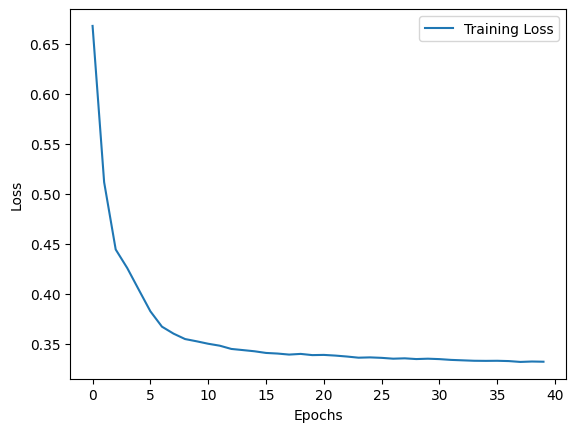

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

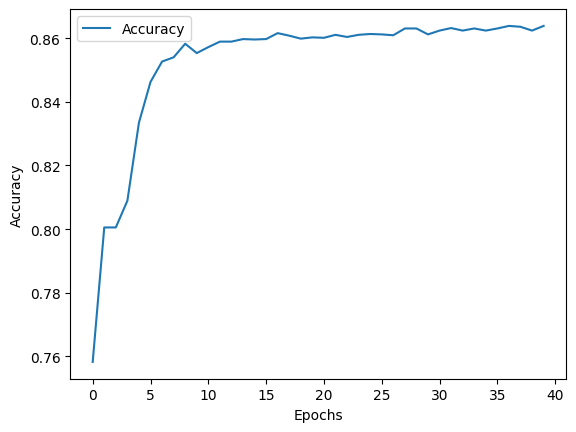

In [33]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()